In [1]:
#import matplotlib
#matplotlib.use('WebAgg')
from rlrom.testers import RLTester
from rlrom.utils import load_cfg
import rlrom.utils as rlu
import rlrom.plots as rlp
%matplotlib ipympl
import time

2025-11-05 00:38:04.282779: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-05 00:38:04.315415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-05 00:38:04.932862: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical 

Imported module highway
loading field [ cfg_env ] from YAML file [ cfg_env_manual.yml ]
loading field [ cfg_specs ] from YAML file [ cfg_specs_rmf.yml ]
loading field [ specs ] from STL file [ hw-env_specs.stl ]
loading field [ eval_formulas ] from YAML file [ cfg_eval.yml ]
Imported module highway
INFO: manual_control set to True, stay alert.


/home/alex/workspace/rlrom/.venv/lib/python3.13/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


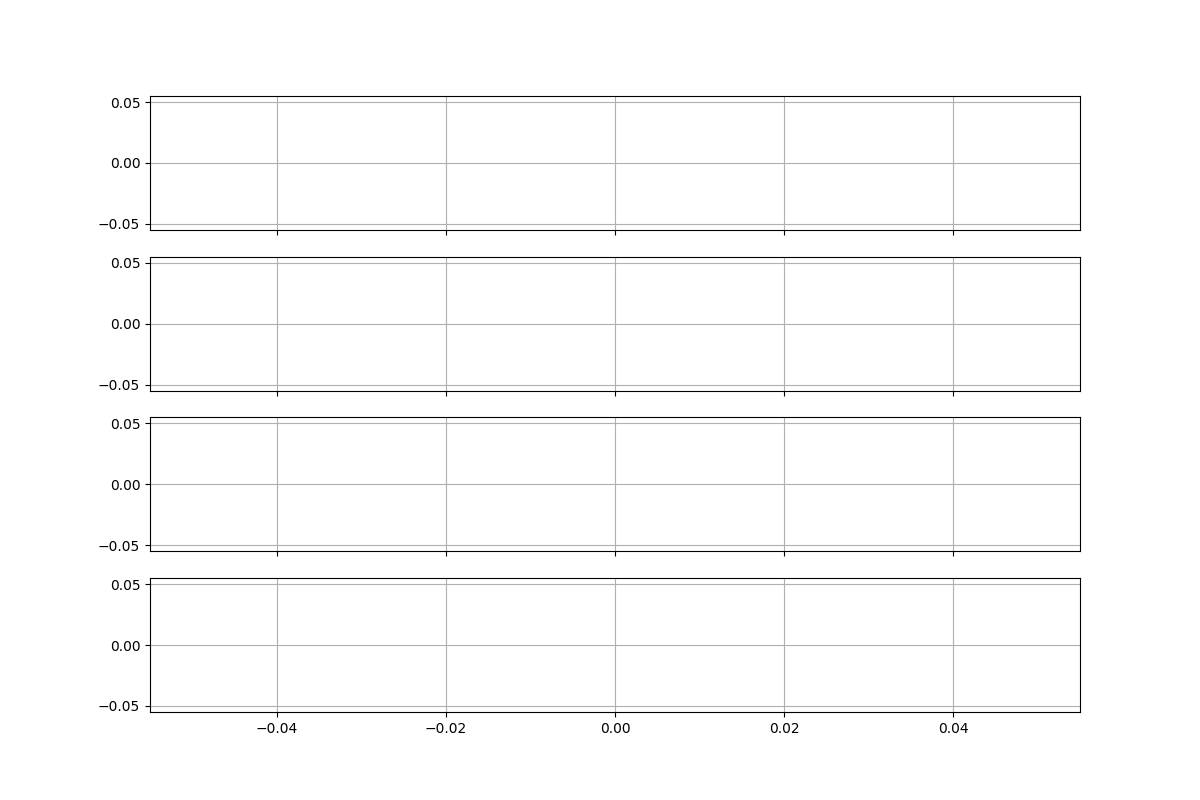

In [2]:
#cfg = 'cfg0tr_rmf.yml'
cfg = 'cfg0_manual_rm.yml'
layout = """
ego_vx
sat(danger)
sat(ego_right_lane)
reward
"""
seed=0 
num_step = 100
t_sleep = .5

cfg = load_cfg(cfg)
cfg = rlu.set_rec_cfg_field(cfg, num_ep=1)
T = RLTester(cfg)
T.init_env()        
T.load_model()
last_obs, info = T.env.reset(seed=seed)    

rl_fig = rlp.RLFig(T,layout)
rl_fig.fig.show()


In [3]:
for _ in range(100):    
    action = T._get_action(last_obs)
    obs, reward, terminated, truncated, info = T.env.step(action)    
    rl_fig.update()
    if t_sleep>0:
        time.sleep(t_sleep)
    last_obs=obs
    if terminated:                
       break
T.env.close()

In [9]:
T.env.close()

In [ ]:
print(lv2.line.get_ydata())

In [ ]:
from pprint import pprint
pprint(cfg['cfg_test'])

In [ ]:
l = ax.lines[0]

#l.set_ydata(y/(2*np.random.rand()))

l.set_xdata(np.append(x, 7))
l.set_ydata(np.append(y, 0))


In [ ]:
lay = """
reward
sat(fa_n_da)
sat(Gda)
sat(fa_da)
sat(n_fa_n_da)
sat(not_right_too_long, -10)
"""
fig, _=  T.get_fig(lay)
show(fig)

In [ ]:
cfg = 'cfg0_manual_rm.yml'
cfg = load_cfg(cfg)

T = RLTester(cfg)
T.run_cfg_test()

lay = """
reward
sat(fa_n_da)
sat(Gda)
sat(fa_da)
sat(n_fa_n_da)
sat(not_right_too_long, -10)
"""
fig, _=  T.get_fig(lay)
show(fig)